In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from mmq import metodo_minimos_quadrados

In [185]:
df_tabela_ligantes = pd.read_excel(
    os.path.join("dados", "df_tabela_ligantes.xlsx")
)
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes
0,1,00:00:00,00:15:00,601
1,2,00:15:00,00:30:00,190
2,3,00:30:00,00:45:00,180
3,4,00:45:00,01:00:00,177
4,5,01:00:00,01:15:00,162
...,...,...,...,...
91,92,22:45:00,23:00:00,920
92,93,23:00:00,23:15:00,897
93,94,23:15:00,23:30:00,571
94,95,23:30:00,23:45:00,560


In [186]:
df_duracoes = pd.read_excel(
    os.path.join("dados", "df_duracoes.xlsx")
)
df_duracoes

,duracao_conexao,numero_ligantes,percentagem_relativa,percentagem_acumulada
0,0,0,0.000,0.000
1,5,870,0.087,0.087
2,10,2210,0.221,0.308
3,15,2940,0.294,0.602
4,20,1710,0.171,0.773
5,25,1360,0.136,0.909
6,30,590,0.059,0.968
7,35,250,0.025,0.993
8,40,70,0.007,1.000


<Axes: xlabel='duracao_conexao'>

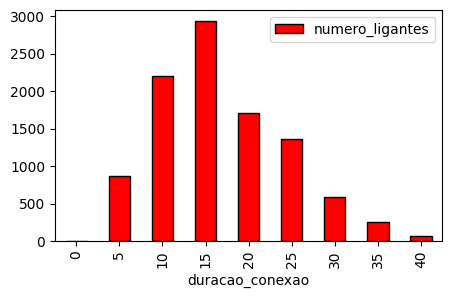

In [187]:
df_duracoes.plot(x="duracao_conexao",
                 y="numero_ligantes",
                 kind="bar",
                 figsize=(5, 3),
                 color="red",
                 edgecolor="black")

<Axes: xlabel='percentagem_acumulada', ylabel='duracao_conexao'>

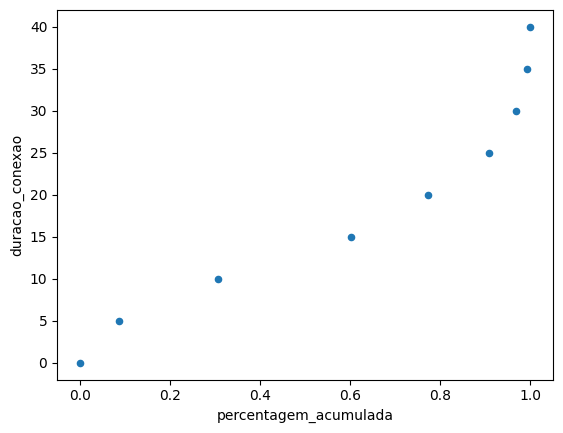

In [188]:
df_duracoes.plot(
    x="percentagem_acumulada",
    y="duracao_conexao",
    kind="scatter",
)

In [189]:
coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    5
)
coefs

array([  7.25285080e+02,  -1.67791097e+03,   1.41326154e+03,
        -5.23808659e+02,   1.01010563e+02,  -2.06253859e-01])

In [190]:
x = np.linspace(0, 1, 1000)
y = np.polyval(coefs, x)
print(x[::100].round(1))
print(y[::100].round(1))

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
[ -0.2   5.9   7.9   9.3  11.3  13.8  16.   17.6  19.4  24.2]


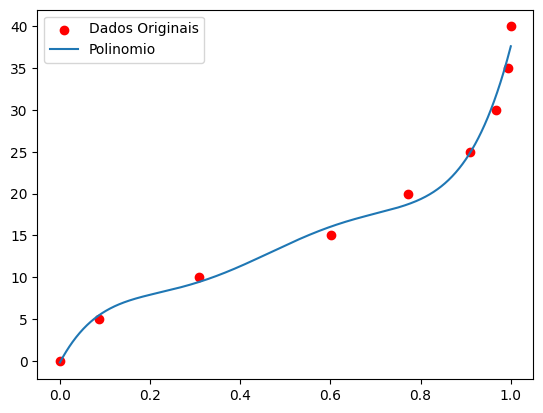

In [191]:
percentagens_acumuladas = df_duracoes["percentagem_acumulada"]
duracoes = df_duracoes["duracao_conexao"]

plt.scatter(percentagens_acumuladas, duracoes,
            color="red", label="Dados Originais")
plt.plot(x, y, label="Polinomio")
plt.legend()
plt.show()

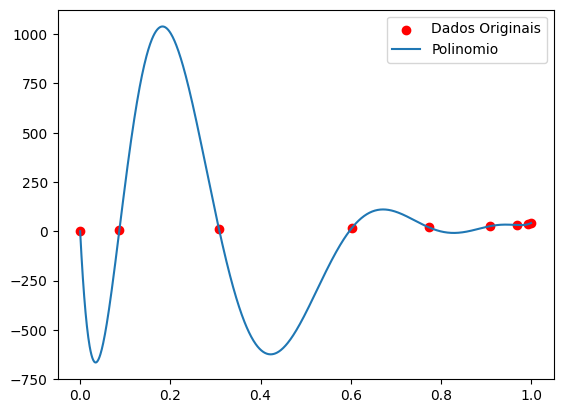

In [192]:
coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    8
)
# ----------------------------------------------------------------------

x = np.linspace(0, 1, 1000)
y = np.polyval(coefs, x)

# ----------------------------------------------------------------------

percentagens_acumuladas = df_duracoes["percentagem_acumulada"]
duracoes = df_duracoes["duracao_conexao"]

plt.scatter(percentagens_acumuladas, duracoes,
            color="red", label="Dados Originais")
plt.plot(x, y, label="Polinomio")
plt.legend()
plt.show()

In [193]:
coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    5
)
coefs

array([  7.25285080e+02,  -1.67791097e+03,   1.41326154e+03,
        -5.23808659e+02,   1.01010563e+02,  -2.06253859e-01])

In [194]:
np.polyval(coefs, 0)

-0.20625385920720873

In [195]:
np.polyval(coefs, [0, 0.1, 0.2, 0.3])

array([-0.20625386,  5.90943916,  7.89703842,  9.28356129])

In [196]:
tempos_aleatorios = []
for _ in range(10_000):
    alpha = np.random.random()
    tempo = np.polyval(coefs, alpha)
    tempos_aleatorios.append(tempo)

np.mean(tempos_aleatorios)

14.366061689942045

In [197]:
df_tabela_ligantes.loc[0]

rotulo                          1
hora_inicio              00:00:00
hora_fim                 00:15:00
numero_medio_ligantes         601
Name: 0, dtype: object

In [198]:
qtd_ligacoes = \
    df_tabela_ligantes.loc[0, "numero_medio_ligantes"]
qtd_ligacoes

601

In [199]:
np.random.seed(0)
momentos_ligacoes = np.random.randint(0, 900, size=qtd_ligacoes)
momentos_ligacoes[:10]

array([684, 559, 629, 192, 835, 763, 707, 359,   9, 723])

In [200]:
df_duracoes.loc[0,"duracao_conexao"]

0

In [201]:
df_duracoes.iloc[0, 0]

0

In [202]:
momentos_ligacoes[:10]

array([684, 559, 629, 192, 835, 763, 707, 359,   9, 723])

In [203]:
momentos_ligacoes.sort()
momentos_ligacoes[:10]

array([ 0,  3,  4,  4,  7,  9, 11, 11, 13, 13])

In [204]:
atendentes: list[dict] = []

In [205]:
np.set_printoptions(legacy="1.13")

In [206]:
momento_ligacao = momentos_ligacoes[0]
momento_ligacao

0

In [207]:
np.random.seed(0)
aleatorio = np.random.rand()
tempo_duracao = abs(np.polyval(coefs, aleatorio))
print(tempo_duracao)

14.9651548698


In [208]:
if atendentes == []:
    atendente = {
        "inicio": momento_ligacao,
        "fim": momento_ligacao + tempo_duracao
    }
    atendentes.append(atendente)

atendentes

[{'inicio': 0, 'fim': 14.965154869825788}]

In [209]:
momento_ligacao = momentos_ligacoes[1]
momento_ligacao

3

In [210]:
espera_maxima = 10
tempo_descanso = 0

In [211]:
np.random.seed(1)
aleatorio = np.random.random()
tempo_duracao = abs(np.polyval(coefs, aleatorio))
tempo_duracao

11.718611909935627

In [212]:
for atendente in atendentes:
    fim = atendente["fim"] + tempo_descanso

    if momento_ligacao + espera_maxima < fim:
        ocupado = True
    else:
        ocupado = False

    if not ocupado:

        if momento_ligacao + espera_maxima > fim:
            atendente["inicio"] = momento_ligacao + espera_maxima
        else:
            atendente["inicio"] = fim
        
        atendente["fim"] = atendente["inicio"] + tempo_duracao
        break
else:

    atendente = {
        "inicio": momento_ligacao,
        "fim": momento_ligacao + tempo_duracao
    }
    atendentes.append(atendente)
atendentes

[{'inicio': 0, 'fim': 14.965154869825788},
 {'inicio': 3, 'fim': 14.718611909935627}]

In [213]:
momento_ligacao = momentos_ligacoes[2]
momento_ligacao

4

In [214]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
atendentes = []
for momento_ligacao in momentos_ligacoes:
    aleatorio = np.random.random()
    tempo_duracao = abs(np.polyval(coefs, aleatorio))

    for atendente in atendentes:
        fim = atendente["fim"] + tempo_descanso

        if momento_ligacao + espera_maxima < fim:
            ocupado = True
        else:
            ocupado = False

        if not ocupado:

            if momento_ligacao + espera_maxima > fim:
                atendente["inicio"] = momento_ligacao + espera_maxima
            else:
                atendente["inicio"] = fim
            
            atendente["fim"] = atendente["inicio"] + tempo_duracao
            break
    else:

        atendente = {
            "inicio": momento_ligacao,
            "fim": momento_ligacao + tempo_duracao
        }
        atendentes.append(atendente)

atendentes

[{'inicio': 904, 'fim': 914.40375649847124},
 {'inicio': 906, 'fim': 917.8694522841929},
 {'inicio': 909, 'fim': 917.37356632865908},
 {'inicio': 900, 'fim': 912.04701461232753},
 {'inicio': 906, 'fim': 913.54143974651595},
 {'inicio': 906, 'fim': 909.21101754494043},
 {'inicio': 907, 'fim': 923.65667308553873},
 {'inicio': 898, 'fim': 910.8046881523278},
 {'inicio': 892, 'fim': 918.91345868734425},
 {'inicio': 892, 'fim': 899.69624954326127},
 {'inicio': 895, 'fim': 921.10612200644232},
 {'inicio': 894, 'fim': 924.69074240731493},
 {'inicio': 894, 'fim': 912.97138605250916},
 {'inicio': 895, 'fim': 911.50408246059612},
 {'inicio': 896, 'fim': 906.2410325325028},
 {'inicio': 896, 'fim': 913.60372670220875},
 {'inicio': 899, 'fim': 917.10414351140616},
 {'inicio': 899, 'fim': 928.75678691456403},
 {'inicio': 899, 'fim': 903.0800609217257},
 {'inicio': 899, 'fim': 906.40232584614864}]

In [215]:
len(atendentes)

20

In [216]:
np.random.permutation([1, 2, 3, 4, 5, 6, 7, 8])

array([2, 1, 5, 4, 8, 6, 3, 7])

In [217]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
atendentes = []
for momento_ligacao in momentos_ligacoes:
    aleatorio = np.random.random()
    tempo_duracao = abs(np.polyval(coefs, aleatorio))

    atendentes = list(np.random.permutation(atendentes))

    for atendente in atendentes:
        fim = atendente["fim"] + tempo_descanso

        if momento_ligacao + espera_maxima < fim:
            ocupado = True
        else:
            ocupado = False

        if not ocupado:

            if momento_ligacao + espera_maxima > fim:
                atendente["inicio"] = momento_ligacao + espera_maxima
            else:
                atendente["inicio"] = fim
            
            atendente["fim"] = atendente["inicio"] + tempo_duracao
            break
    else:

        atendente = {
            "inicio": momento_ligacao,
            "fim": momento_ligacao + tempo_duracao
        }
        atendentes.append(atendente)

atendentes

[{'inicio': 899, 'fim': 909.2955984382935},
 {'inicio': 900, 'fim': 910.8933443088107},
 {'inicio': 899, 'fim': 932.21236757046836},
 {'inicio': 909, 'fim': 917.53861755804292},
 {'inicio': 904, 'fim': 920.23396462120218},
 {'inicio': 899, 'fim': 908.85265704311962},
 {'inicio': 867, 'fim': 894.9962068898227},
 {'inicio': 901, 'fim': 917.6665794050017},
 {'inicio': 907, 'fim': 915.17518229721816},
 {'inicio': 906, 'fim': 913.65133331309642},
 {'inicio': 896, 'fim': 906.82228408259152},
 {'inicio': 892, 'fim': 907.66966275984714},
 {'inicio': 882, 'fim': 901.1383790602481},
 {'inicio': 883, 'fim': 902.83508526845742},
 {'inicio': 814, 'fim': 843.61932083750025},
 {'inicio': 899, 'fim': 907.73089614698119},
 {'inicio': 896, 'fim': 912.80887286969016},
 {'inicio': 906, 'fim': 930.77650857786512},
 {'inicio': 906, 'fim': 914.04967842263852}]

In [218]:
len(atendentes)

19

In [219]:
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes
0,1,00:00:00,00:15:00,601
1,2,00:15:00,00:30:00,190
2,3,00:30:00,00:45:00,180
3,4,00:45:00,01:00:00,177
4,5,01:00:00,01:15:00,162
...,...,...,...,...
91,92,22:45:00,23:00:00,920
92,93,23:00:00,23:15:00,897
93,94,23:15:00,23:30:00,571
94,95,23:30:00,23:45:00,560


In [220]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
coluna_nan = []
for i, linha in df_tabela_ligantes.iterrows():
    qtd_ligacoes = linha["numero_medio_ligantes"]

    momentos_ligacoes = np.random.randint(0, 900, size=qtd_ligacoes)
    momentos_ligacoes.sort()

    atendentes = []
    for momento_ligacao in momentos_ligacoes:
        aleatorio = np.random.random()
        tempo_duracao = abs(np.polyval(coefs, aleatorio))

        atendentes = list(np.random.permutation(atendentes))

        for atendente in atendentes:
            fim = atendente["fim"] + tempo_descanso

            if momento_ligacao + espera_maxima < fim:
                ocupado = True
            else:
                ocupado = False

            if not ocupado:

                if momento_ligacao + espera_maxima > fim:
                    atendente["inicio"] = momento_ligacao + espera_maxima
                else:
                    atendente["inicio"] = fim
                
                atendente["fim"] = atendente["inicio"] + tempo_duracao
                break
        else:

            atendente = {
                "inicio": momento_ligacao,
                "fim": momento_ligacao + tempo_duracao
            }
            atendentes.append(atendente)
    
    nan = len(atendentes)
    coluna_nan.append(nan)

coluna_nan

[20,
 9,
 8,
 9,
 8,
 5,
 6,
 7,
 5,
 5,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 3,
 4,
 6,
 6,
 8,
 7,
 20,
 21,
 23,
 23,
 41,
 41,
 41,
 45,
 66,
 59,
 60,
 67,
 70,
 75,
 71,
 75,
 66,
 64,
 62,
 68,
 57,
 57,
 56,
 60,
 64,
 67,
 63,
 70,
 69,
 67,
 64,
 66,
 71,
 66,
 70,
 67,
 68,
 66,
 68,
 71,
 68,
 69,
 73,
 62,
 55,
 51,
 52,
 48,
 45,
 44,
 39,
 38,
 41,
 36,
 36,
 40,
 36,
 34,
 30,
 31,
 31,
 26,
 26,
 26,
 23,
 18,
 18,
 18]

In [221]:
df_tabela_ligantes["nan"] = coluna_nan
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes,nan
0,1,00:00:00,00:15:00,601,20
1,2,00:15:00,00:30:00,190,9
2,3,00:30:00,00:45:00,180,8
3,4,00:45:00,01:00:00,177,9
4,5,01:00:00,01:15:00,162,8
...,...,...,...,...,...
91,92,22:45:00,23:00:00,920,26
92,93,23:00:00,23:15:00,897,23
93,94,23:15:00,23:30:00,571,18
94,95,23:30:00,23:45:00,560,18


---
# Attentus

In [222]:
import pulp as plp

In [223]:
df_nan = df_tabela_ligantes.copy()
df_nan["nan"] = coluna_nan
df_nan

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes,nan
0,1,00:00:00,00:15:00,601,20
1,2,00:15:00,00:30:00,190,9
2,3,00:30:00,00:45:00,180,8
3,4,00:45:00,01:00:00,177,9
4,5,01:00:00,01:15:00,162,8
...,...,...,...,...,...
91,92,22:45:00,23:00:00,920,26
92,93,23:00:00,23:15:00,897,23
93,94,23:15:00,23:30:00,571,18
94,95,23:30:00,23:45:00,560,18


In [224]:
df_nad = pd.read_excel(
    os.path.join("dados", "nad.xlsx")
)
df_nad

,regime,enc
0,3,540
1,4,680
2,6,960


In [225]:
from itertools import product

In [226]:
regimes = \
    df_nad["regime"].to_dict()
regimes

{0: 3, 1: 4, 2: 6}

In [227]:
inicios = \
    df_nan["hora_inicio"].to_dict()
inicios

{0: datetime.time(0, 0),
 1: datetime.time(0, 15),
 2: datetime.time(0, 30),
 3: datetime.time(0, 45),
 4: datetime.time(1, 0),
 5: datetime.time(1, 15),
 6: datetime.time(1, 30),
 7: datetime.time(1, 45),
 8: datetime.time(2, 0),
 9: datetime.time(2, 15),
 10: datetime.time(2, 30),
 11: datetime.time(2, 45),
 12: datetime.time(3, 0),
 13: datetime.time(3, 15),
 14: datetime.time(3, 30),
 15: datetime.time(3, 45),
 16: datetime.time(4, 0),
 17: datetime.time(4, 15),
 18: datetime.time(4, 30),
 19: datetime.time(4, 45),
 20: datetime.time(5, 0),
 21: datetime.time(5, 15),
 22: datetime.time(5, 30),
 23: datetime.time(5, 45),
 24: datetime.time(6, 0),
 25: datetime.time(6, 15),
 26: datetime.time(6, 30),
 27: datetime.time(6, 45),
 28: datetime.time(7, 0),
 29: datetime.time(7, 15),
 30: datetime.time(7, 30),
 31: datetime.time(7, 45),
 32: datetime.time(8, 0),
 33: datetime.time(8, 15),
 34: datetime.time(8, 30),
 35: datetime.time(8, 45),
 36: datetime.time(9, 0),
 37: datetime.time(9,

In [228]:
lista_variaveis = list(product(regimes, inicios))
lista_variaveis

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 83),
 (0, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (0, 88),
 (0, 89),
 (0, 90),
 (0, 91),
 (0, 92),
 (0, 93),
 (0, 94),
 (0, 95),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 

In [229]:
prob = plp.LpProblem(
    name="Attentus", sense=plp.LpMinimize
)
prob

Attentus:
MINIMIZE
None
VARIABLES

In [230]:
pulp_variaveis = plp.LpVariable.dicts(
    "A", lista_variaveis, lowBound=0, cat=plp.LpInteger
)
pulp_variaveis

{(0, 0): A_(0,_0),
 (0, 1): A_(0,_1),
 (0, 2): A_(0,_2),
 (0, 3): A_(0,_3),
 (0, 4): A_(0,_4),
 (0, 5): A_(0,_5),
 (0, 6): A_(0,_6),
 (0, 7): A_(0,_7),
 (0, 8): A_(0,_8),
 (0, 9): A_(0,_9),
 (0, 10): A_(0,_10),
 (0, 11): A_(0,_11),
 (0, 12): A_(0,_12),
 (0, 13): A_(0,_13),
 (0, 14): A_(0,_14),
 (0, 15): A_(0,_15),
 (0, 16): A_(0,_16),
 (0, 17): A_(0,_17),
 (0, 18): A_(0,_18),
 (0, 19): A_(0,_19),
 (0, 20): A_(0,_20),
 (0, 21): A_(0,_21),
 (0, 22): A_(0,_22),
 (0, 23): A_(0,_23),
 (0, 24): A_(0,_24),
 (0, 25): A_(0,_25),
 (0, 26): A_(0,_26),
 (0, 27): A_(0,_27),
 (0, 28): A_(0,_28),
 (0, 29): A_(0,_29),
 (0, 30): A_(0,_30),
 (0, 31): A_(0,_31),
 (0, 32): A_(0,_32),
 (0, 33): A_(0,_33),
 (0, 34): A_(0,_34),
 (0, 35): A_(0,_35),
 (0, 36): A_(0,_36),
 (0, 37): A_(0,_37),
 (0, 38): A_(0,_38),
 (0, 39): A_(0,_39),
 (0, 40): A_(0,_40),
 (0, 41): A_(0,_41),
 (0, 42): A_(0,_42),
 (0, 43): A_(0,_43),
 (0, 44): A_(0,_44),
 (0, 45): A_(0,_45),
 (0, 46): A_(0,_46),
 (0, 47): A_(0,_47),
 (0, 48): A_

In [231]:
coeficientes = []
for indice_regime, indice_periodo in lista_variaveis:
    encargo = df_nad.loc[indice_regime, "enc"]
    coeficientes.append(encargo)
print(coeficientes[::10])

[540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 680, 680, 680, 680, 680, 680, 680, 680, 680, 680, 960, 960, 960, 960, 960, 960, 960, 960, 960]


In [232]:
fo = plp.lpSum(
    [coef * pulp_variaveis[var] 
     for coef, var in zip(coeficientes, lista_variaveis)]
)
prob += fo, "custo"
prob

Attentus:
MINIMIZE
540*A_(0,_0) + 540*A_(0,_1) + 540*A_(0,_10) + 540*A_(0,_11) + 540*A_(0,_12) + 540*A_(0,_13) + 540*A_(0,_14) + 540*A_(0,_15) + 540*A_(0,_16) + 540*A_(0,_17) + 540*A_(0,_18) + 540*A_(0,_19) + 540*A_(0,_2) + 540*A_(0,_20) + 540*A_(0,_21) + 540*A_(0,_22) + 540*A_(0,_23) + 540*A_(0,_24) + 540*A_(0,_25) + 540*A_(0,_26) + 540*A_(0,_27) + 540*A_(0,_28) + 540*A_(0,_29) + 540*A_(0,_3) + 540*A_(0,_30) + 540*A_(0,_31) + 540*A_(0,_32) + 540*A_(0,_33) + 540*A_(0,_34) + 540*A_(0,_35) + 540*A_(0,_36) + 540*A_(0,_37) + 540*A_(0,_38) + 540*A_(0,_39) + 540*A_(0,_4) + 540*A_(0,_40) + 540*A_(0,_41) + 540*A_(0,_42) + 540*A_(0,_43) + 540*A_(0,_44) + 540*A_(0,_45) + 540*A_(0,_46) + 540*A_(0,_47) + 540*A_(0,_48) + 540*A_(0,_49) + 540*A_(0,_5) + 540*A_(0,_50) + 540*A_(0,_51) + 540*A_(0,_52) + 540*A_(0,_53) + 540*A_(0,_54) + 540*A_(0,_55) + 540*A_(0,_56) + 540*A_(0,_57) + 540*A_(0,_58) + 540*A_(0,_59) + 540*A_(0,_6) + 540*A_(0,_60) + 540*A_(0,_61) + 540*A_(0,_62) + 540*A_(0,_63) + 540*A_(0,_64

In [233]:
prob.numVariables()

288

In [234]:
prob.numConstraints()

0

In [235]:
lista = [0, 1, 2, 3, 4, 5, 6, 7]
lista

[0, 1, 2, 3, 4, 5, 6, 7]

In [236]:
janela = 3

In [237]:
# j = 2
lista[0:3]

[0, 1, 2]

In [238]:
# j = 3
lista[1:4]

[1, 2, 3]

In [239]:
# j = 4
lista[2:5]

[2, 3, 4]

In [240]:
# j = 5
lista[3:6]

[3, 4, 5]

In [241]:
# j = 6
lista[4:7]

[4, 5, 6]

In [242]:
# j = 7
lista[5:8]

[5, 6, 7]

In [243]:
# j = 0
lista[6:9]

[6, 7]

In [244]:
print(lista[0:3])
print(lista[1:4])
print(lista[2:5])
print(lista[3:6])
print(lista[4:7])
print(lista[5:8])

[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]


In [245]:
# j = 0
print(lista[-2:] + lista[:1])

[6, 7, 0]


In [246]:
lista[-1:] + lista[:2]

[7, 0, 1]

In [247]:
print(lista[-2:] + lista[:1])
print(lista[-1:] + lista[:2])
print(lista[0:3])
print(lista[1:4])
print(lista[2:5])
print(lista[3:6])
print(lista[4:7])
print(lista[5:8])

[6, 7, 0]
[7, 0, 1]
[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]


In [248]:
print(lista[2-3+1:2+1])   # j = 2, jan=3
print(lista[3-3+1:3+1])   # j = 3, jan=3
print(lista[4-3+1:4+1])   # j = 4, jan=3
print(lista[5-3+1:5+1])   # j = 5, jan=3
print(lista[6-3+1:6+1])   # j = 6, jan=3
print(lista[7-3+1:7+1])   # j = 7, jan=3

[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]


In [249]:
print(lista[0-3+1:] + lista[:0+1])   # j = 0, jan=3
print(lista[1-3+1:] + lista[:1+1])   # j = 1, jan=3

[6, 7, 0]
[7, 0, 1]


In [250]:
print(lista[0-3+1:] + lista[:0+1])   # j = 0, jan=3
print(lista[1-3+1:] + lista[:1+1])   # j = 1, jan=3
print(lista[2-3+1:2+1])   # j = 2, jan=3
print(lista[3-3+1:3+1])   # j = 3, jan=3
print(lista[4-3+1:4+1])   # j = 4, jan=3
print(lista[5-3+1:5+1])   # j = 5, jan=3
print(lista[6-3+1:6+1])   # j = 6, jan=3
print(lista[7-3+1:7+1])   # j = 7, jan=3

[6, 7, 0]
[7, 0, 1]
[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]


In [251]:
def retorna_lista(j, tamanho, lista):
    if j >= tamanho - 1:
        return lista[j-tamanho+1 : j+1]
    else:
        return lista[j-tamanho+1 : ] + lista[ : j+1]

In [252]:
retorna_lista(j=4, tamanho=3, lista=lista)

[2, 3, 4]

In [253]:
retorna_lista(j=5, tamanho=3, lista=lista)

[3, 4, 5]

In [254]:
retorna_lista(j=6, tamanho=3, lista=lista)

[4, 5, 6]

In [255]:
retorna_lista(j=7, tamanho=3, lista=lista)

[5, 6, 7]

In [256]:
retorna_lista(j=0, tamanho=3, lista=lista)

[6, 7, 0]

In [257]:
retorna_lista(j=1, tamanho=3, lista=lista)

[7, 0, 1]

In [258]:
lista_variaveis

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 83),
 (0, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (0, 88),
 (0, 89),
 (0, 90),
 (0, 91),
 (0, 92),
 (0, 93),
 (0, 94),
 (0, 95),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 

In [259]:
retorna_lista(j=95, tamanho=12, 
              lista=list(inicios))

[84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]

In [260]:
retorna_lista(j=0, tamanho=12, lista=list(inicios))

[85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0]

In [261]:
df_nan

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes,nan
0,1,00:00:00,00:15:00,601,20
1,2,00:15:00,00:30:00,190,9
2,3,00:30:00,00:45:00,180,8
3,4,00:45:00,01:00:00,177,9
4,5,01:00:00,01:15:00,162,8
...,...,...,...,...,...
91,92,22:45:00,23:00:00,920,26
92,93,23:00:00,23:15:00,897,23
93,94,23:15:00,23:30:00,571,18
94,95,23:30:00,23:45:00,560,18


In [262]:
for x in df_nan:
    print(x)

rotulo
hora_inicio
hora_fim
numero_medio_ligantes
nan


In [263]:
for j, linha in df_nan.iterrows():
    nan = linha["nan"]
    linha_restricao = []
    for regime in regimes:
        tamanho = regimes[regime] * 4
        lista = retorna_lista(j=j, tamanho=tamanho,
                              lista=list(inicios))
        lista_combinada = [(regime, i) for i in lista]
        lista_traduzida = [pulp_variaveis[tupla] 
                           for tupla in lista_combinada]
        linha_restricao += lista_traduzida
    prob += plp.lpSum(linha_restricao) >= nan
prob

Attentus:
MINIMIZE
540*A_(0,_0) + 540*A_(0,_1) + 540*A_(0,_10) + 540*A_(0,_11) + 540*A_(0,_12) + 540*A_(0,_13) + 540*A_(0,_14) + 540*A_(0,_15) + 540*A_(0,_16) + 540*A_(0,_17) + 540*A_(0,_18) + 540*A_(0,_19) + 540*A_(0,_2) + 540*A_(0,_20) + 540*A_(0,_21) + 540*A_(0,_22) + 540*A_(0,_23) + 540*A_(0,_24) + 540*A_(0,_25) + 540*A_(0,_26) + 540*A_(0,_27) + 540*A_(0,_28) + 540*A_(0,_29) + 540*A_(0,_3) + 540*A_(0,_30) + 540*A_(0,_31) + 540*A_(0,_32) + 540*A_(0,_33) + 540*A_(0,_34) + 540*A_(0,_35) + 540*A_(0,_36) + 540*A_(0,_37) + 540*A_(0,_38) + 540*A_(0,_39) + 540*A_(0,_4) + 540*A_(0,_40) + 540*A_(0,_41) + 540*A_(0,_42) + 540*A_(0,_43) + 540*A_(0,_44) + 540*A_(0,_45) + 540*A_(0,_46) + 540*A_(0,_47) + 540*A_(0,_48) + 540*A_(0,_49) + 540*A_(0,_5) + 540*A_(0,_50) + 540*A_(0,_51) + 540*A_(0,_52) + 540*A_(0,_53) + 540*A_(0,_54) + 540*A_(0,_55) + 540*A_(0,_56) + 540*A_(0,_57) + 540*A_(0,_58) + 540*A_(0,_59) + 540*A_(0,_6) + 540*A_(0,_60) + 540*A_(0,_61) + 540*A_(0,_62) + 540*A_(0,_63) + 540*A_(0,_64

In [264]:
prob.numConstraints()

96

In [265]:
prob.status

0

In [266]:
plp.LpStatus[prob.status]

'Not Solved'

In [267]:
plp.listSolvers(onlyAvailable=True)

['PULP_CBC_CMD']

In [268]:
solver = plp.getSolver('PULP_CBC_CMD')

In [269]:
prob.solve(solver)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ijasenovski/cpp/mmap_um/attentus/.venv_attentus/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/jt/q_qtkv7d5cz93g3npm3tg6n00000gn/T/4ef9a87b2daf480e8dd024244adac2ee-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/jt/q_qtkv7d5cz93g3npm3tg6n00000gn/T/4ef9a87b2daf480e8dd024244adac2ee-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 101 COLUMNS
At line 5958 RHS
At line 6055 BOUNDS
At line 6344 ENDATA
Problem MODEL has 96 rows, 288 columns and 4992 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 153480 - 0.00 seconds
Cgl0003I 0 fixed, 288 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 96 rows, 288 columns (288 integer (0 of which binary)) and 4992 elements
Cutoff increment increased from 1e

1

In [270]:
plp.LpStatus[prob.status]

'Optimal'

In [271]:
prob.objective.value()

153480.0

In [272]:
pulp_variaveis

{(0, 0): A_(0,_0),
 (0, 1): A_(0,_1),
 (0, 2): A_(0,_2),
 (0, 3): A_(0,_3),
 (0, 4): A_(0,_4),
 (0, 5): A_(0,_5),
 (0, 6): A_(0,_6),
 (0, 7): A_(0,_7),
 (0, 8): A_(0,_8),
 (0, 9): A_(0,_9),
 (0, 10): A_(0,_10),
 (0, 11): A_(0,_11),
 (0, 12): A_(0,_12),
 (0, 13): A_(0,_13),
 (0, 14): A_(0,_14),
 (0, 15): A_(0,_15),
 (0, 16): A_(0,_16),
 (0, 17): A_(0,_17),
 (0, 18): A_(0,_18),
 (0, 19): A_(0,_19),
 (0, 20): A_(0,_20),
 (0, 21): A_(0,_21),
 (0, 22): A_(0,_22),
 (0, 23): A_(0,_23),
 (0, 24): A_(0,_24),
 (0, 25): A_(0,_25),
 (0, 26): A_(0,_26),
 (0, 27): A_(0,_27),
 (0, 28): A_(0,_28),
 (0, 29): A_(0,_29),
 (0, 30): A_(0,_30),
 (0, 31): A_(0,_31),
 (0, 32): A_(0,_32),
 (0, 33): A_(0,_33),
 (0, 34): A_(0,_34),
 (0, 35): A_(0,_35),
 (0, 36): A_(0,_36),
 (0, 37): A_(0,_37),
 (0, 38): A_(0,_38),
 (0, 39): A_(0,_39),
 (0, 40): A_(0,_40),
 (0, 41): A_(0,_41),
 (0, 42): A_(0,_42),
 (0, 43): A_(0,_43),
 (0, 44): A_(0,_44),
 (0, 45): A_(0,_45),
 (0, 46): A_(0,_46),
 (0, 47): A_(0,_47),
 (0, 48): A_

In [273]:
resultados = []
for v_tupla, v_pulp in pulp_variaveis.items():
    # print(v_pulp.varValue, v_tupla)
    indice_regime, indice_inicio = v_tupla
    nome_regime = regimes[indice_regime]
    nome_inicio = inicios[indice_inicio]
    # print(nome_regime, nome_inicio)
    resultados.append({
        "regime": nome_regime,
        "inicio": nome_inicio,
        "valor": v_pulp.varValue
    })
resultados

[{'regime': 3, 'inicio': datetime.time(0, 0), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(0, 15), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(0, 30), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(0, 45), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(1, 0), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(1, 15), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(1, 30), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(1, 45), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(2, 0), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(2, 15), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(2, 30), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(2, 45), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(3, 0), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(3, 15), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(3, 30), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(3, 45), 'valor': 0.0},
 {'regime': 

In [274]:
df_resultados = pd.DataFrame(resultados)
df_resultados

,regime,inicio,valor
0,3,00:00:00,0.0
1,3,00:15:00,0.0
2,3,00:30:00,0.0
3,3,00:45:00,0.0
4,3,01:00:00,0.0
...,...,...,...
283,6,22:45:00,1.0
284,6,23:00:00,0.0
285,6,23:15:00,0.0
286,6,23:30:00,2.0


In [275]:
df_resultados.loc[df_resultados["valor"] > 0]

,regime,inicio,valor
36,3,09:00:00,5.0
58,3,14:30:00,3.0
113,4,04:15:00,1.0
124,4,07:00:00,9.0
125,4,07:15:00,1.0
126,4,07:30:00,2.0
127,4,07:45:00,2.0
128,4,08:00:00,6.0
129,4,08:15:00,1.0
132,4,09:00:00,2.0


In [276]:
df_resutados_pivotado = \
    df_resultados.pivot_table(columns="regime",
                              index="inicio",
                              values="valor")
df_resutados_pivotado

regime,3,4,6
inicio,,,
00:00:00,0.0,0.0,0.0
00:15:00,0.0,0.0,0.0
00:30:00,0.0,0.0,0.0
00:45:00,0.0,0.0,1.0
01:00:00,0.0,0.0,0.0
...,...,...,...
22:45:00,0.0,0.0,1.0
23:00:00,0.0,0.0,0.0
23:15:00,0.0,0.0,0.0


In [277]:
df_resutados_pivotado.sum(axis=0)

regime
3      8.0
4     57.0
6    115.0
dtype: float64

In [278]:
def encontra_divisores(n):
    divisores = []
    for i in range(1, n // 2 + 1):
        if n % i == 0:
            divisores.append(i)
    
    return divisores

encontra_divisores(60)

[1, 2, 3, 4, 5, 6, 10, 12, 15, 20, 30]

In [279]:
qtd_horas_total = 24
hora_inicial = 0
minuto_inicial = 0

In [280]:
qtd_dias_total = qtd_horas_total / 24
qtd_minutos_total = qtd_horas_total * 60
print(qtd_dias_total, qtd_minutos_total)

1.0 1440


In [281]:
divisores = encontra_divisores(qtd_minutos_total)
print(divisores)

[1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15, 16, 18, 20, 24, 30, 32, 36, 40, 45, 48, 60, 72, 80, 90, 96, 120, 144, 160, 180, 240, 288, 360, 480, 720]


In [282]:
minutos_dividir = divisores[10]
minutos_dividir

15

In [283]:
print(3 * 60 / minutos_dividir)
print(4 * 60 / minutos_dividir)
print(6 * 60 / minutos_dividir)
print(6.11 * 60 / minutos_dividir)

12.0
16.0
24.0
24.44


In [284]:
print((3.00 * 60 / minutos_dividir).as_integer_ratio())
print((4.00 * 60 / minutos_dividir).as_integer_ratio())
print((6.00 * 60 / minutos_dividir).as_integer_ratio())
print((6.11 * 60 / minutos_dividir).as_integer_ratio())

(12, 1)
(16, 1)
(24, 1)
(6879248430808433, 281474976710656)


In [285]:
1 / 60

0.016666666666666666

In [286]:
np.arange(1, 
          12+1/60, 
          1/60)

array([  1.        ,   1.01666667,   1.03333333,   1.05      ,
         1.06666667,   1.08333333,   1.1       ,   1.11666667,
         1.13333333,   1.15      ,   1.16666667,   1.18333333,
         1.2       ,   1.21666667,   1.23333333,   1.25      ,
         1.26666667,   1.28333333,   1.3       ,   1.31666667,
         1.33333333,   1.35      ,   1.36666667,   1.38333333,
         1.4       ,   1.41666667,   1.43333333,   1.45      ,
         1.46666667,   1.48333333,   1.5       ,   1.51666667,
         1.53333333,   1.55      ,   1.56666667,   1.58333333,
         1.6       ,   1.61666667,   1.63333333,   1.65      ,
         1.66666667,   1.68333333,   1.7       ,   1.71666667,
         1.73333333,   1.75      ,   1.76666667,   1.78333333,
         1.8       ,   1.81666667,   1.83333333,   1.85      ,
         1.86666667,   1.88333333,   1.9       ,   1.91666667,
         1.93333333,   1.95      ,   1.96666667,   1.98333333,
         2.        ,   2.01666667,   2.03333333,   2.05

In [287]:
def lista_turnos_possiveis(minutos_dividir,
                           horas_minimas=1,
                           horas_maximas=12):
    passo = 1/60
    turnos_testar = np.arange(horas_minimas,
                              horas_maximas+passo,
                              passo).round(5)
    turnos_horas = []
    for turno in turnos_testar:
        num, den = \
            (turno * 60 / minutos_dividir).as_integer_ratio()
        if den == 1:
            turnos_horas.append(turno)
    
    return turnos_horas
lista_turnos_possiveis(15, 3, 6)


[3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0]

In [288]:
def float_para_horas_minutos(float_num):
    horas = int(float_num)
    minutos = int((float_num - horas) * 60)
    return horas, minutos

In [289]:
dict_turnos_possiveis = {}
for turno in lista_turnos_possiveis(minutos_dividir, 3, 6):
    horas, minutos = float_para_horas_minutos(turno)
    dict_turnos_possiveis[f"{horas:02}h{minutos:02}"] = turno
print(dict_turnos_possiveis)

{'03h00': 3.0, '03h15': 3.25, '03h30': 3.5, '03h45': 3.75, '04h00': 4.0, '04h15': 4.25, '04h30': 4.5, '04h45': 4.75, '05h00': 5.0, '05h15': 5.25, '05h30': 5.5, '05h45': 5.75, '06h00': 6.0}


In [290]:
from datetime import datetime as dtm
from datetime import timedelta as td

In [291]:
hora_inicial = 0
minuto_inicial = 0

In [292]:
qtd_horas_total

24

In [293]:
hora_final = (hora_inicial + qtd_horas_total) % 24
minuto_final = (qtd_horas_total - int(qtd_horas_total)) * 60
print(hora_final, minuto_final)

0 0


In [294]:
dia_final = 1
if hora_inicial == hora_final and minuto_inicial == minuto_final:
    dia_final = 2
dia_final

2

In [295]:
inicios = \
    pd.date_range(
        start=f"2000-01-01 {hora_inicial:02}:{minuto_inicial:02}:00",
        end=dtm.strptime(
        f"2000-01-{dia_final} {hora_final:02}:{minuto_final:02}:59", 
        "%Y-%m-%d %H:%M:%S"
        ),
        freq=f"{minutos_dividir}min"
    ).strftime("%H:%M:%S").tolist()[:-1]
inicios

['00:00:00',
 '00:15:00',
 '00:30:00',
 '00:45:00',
 '01:00:00',
 '01:15:00',
 '01:30:00',
 '01:45:00',
 '02:00:00',
 '02:15:00',
 '02:30:00',
 '02:45:00',
 '03:00:00',
 '03:15:00',
 '03:30:00',
 '03:45:00',
 '04:00:00',
 '04:15:00',
 '04:30:00',
 '04:45:00',
 '05:00:00',
 '05:15:00',
 '05:30:00',
 '05:45:00',
 '06:00:00',
 '06:15:00',
 '06:30:00',
 '06:45:00',
 '07:00:00',
 '07:15:00',
 '07:30:00',
 '07:45:00',
 '08:00:00',
 '08:15:00',
 '08:30:00',
 '08:45:00',
 '09:00:00',
 '09:15:00',
 '09:30:00',
 '09:45:00',
 '10:00:00',
 '10:15:00',
 '10:30:00',
 '10:45:00',
 '11:00:00',
 '11:15:00',
 '11:30:00',
 '11:45:00',
 '12:00:00',
 '12:15:00',
 '12:30:00',
 '12:45:00',
 '13:00:00',
 '13:15:00',
 '13:30:00',
 '13:45:00',
 '14:00:00',
 '14:15:00',
 '14:30:00',
 '14:45:00',
 '15:00:00',
 '15:15:00',
 '15:30:00',
 '15:45:00',
 '16:00:00',
 '16:15:00',
 '16:30:00',
 '16:45:00',
 '17:00:00',
 '17:15:00',
 '17:30:00',
 '17:45:00',
 '18:00:00',
 '18:15:00',
 '18:30:00',
 '18:45:00',
 '19:00:00',

In [296]:
finais = [
    (dtm.strptime(inicio, "%H:%M:%S") + \
    td(minutes=minutos_dividir)).strftime("%H:%M:%S") 
    for inicio in inicios
]
finais

['00:15:00',
 '00:30:00',
 '00:45:00',
 '01:00:00',
 '01:15:00',
 '01:30:00',
 '01:45:00',
 '02:00:00',
 '02:15:00',
 '02:30:00',
 '02:45:00',
 '03:00:00',
 '03:15:00',
 '03:30:00',
 '03:45:00',
 '04:00:00',
 '04:15:00',
 '04:30:00',
 '04:45:00',
 '05:00:00',
 '05:15:00',
 '05:30:00',
 '05:45:00',
 '06:00:00',
 '06:15:00',
 '06:30:00',
 '06:45:00',
 '07:00:00',
 '07:15:00',
 '07:30:00',
 '07:45:00',
 '08:00:00',
 '08:15:00',
 '08:30:00',
 '08:45:00',
 '09:00:00',
 '09:15:00',
 '09:30:00',
 '09:45:00',
 '10:00:00',
 '10:15:00',
 '10:30:00',
 '10:45:00',
 '11:00:00',
 '11:15:00',
 '11:30:00',
 '11:45:00',
 '12:00:00',
 '12:15:00',
 '12:30:00',
 '12:45:00',
 '13:00:00',
 '13:15:00',
 '13:30:00',
 '13:45:00',
 '14:00:00',
 '14:15:00',
 '14:30:00',
 '14:45:00',
 '15:00:00',
 '15:15:00',
 '15:30:00',
 '15:45:00',
 '16:00:00',
 '16:15:00',
 '16:30:00',
 '16:45:00',
 '17:00:00',
 '17:15:00',
 '17:30:00',
 '17:45:00',
 '18:00:00',
 '18:15:00',
 '18:30:00',
 '18:45:00',
 '19:00:00',
 '19:15:00',

In [297]:
len(inicios), len(finais)

(96, 96)

In [298]:
def attentus(df_nan, df_nad, minutos_dividir):
    regimes = \
        df_nad["regime"].to_dict()
    inicios = \
        df_nan["hora_inicio"].to_dict()
    
    lista_variaveis = list(product(regimes, inicios))

    prob = plp.LpProblem(
        name="Attentus", sense=plp.LpMinimize
    )
    
    pulp_variaveis = plp.LpVariable.dicts(
        "A", lista_variaveis, lowBound=0, cat=plp.LpInteger
    )

    coeficientes = []
    for indice_regime, indice_periodo in lista_variaveis:
        encargo = df_nad.loc[indice_regime, "enc"]
        coeficientes.append(encargo)

    fo = plp.lpSum(
        [coef * pulp_variaveis[var] 
        for coef, var in zip(coeficientes, lista_variaveis)]
    )
    prob += fo, "custo"

    for j, linha in df_nan.iterrows():
        nan = linha["nan"]
        linha_restricao = []
        for indice_regime, regime in regimes.items():
            tamanho = int(regime * 60 / minutos_dividir)
            lista = retorna_lista(j=j, tamanho=tamanho,
                                lista=list(inicios))
            
            lista_combinada = [(indice_regime, i) for i in lista]
            lista_traduzida = [pulp_variaveis[tupla] 
                            for tupla in lista_combinada]
            
            linha_restricao += lista_traduzida
        prob += plp.lpSum(linha_restricao) >= nan
    
    solver = plp.getSolver('PULP_CBC_CMD')
    prob.solve(solver)
    return prob

In [299]:
prob = attentus(df_nan, df_nad, minutos_dividir)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ijasenovski/cpp/mmap_um/attentus/.venv_attentus/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/jt/q_qtkv7d5cz93g3npm3tg6n00000gn/T/c3a9b3572edf4088bb0c62ba59e987b8-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/jt/q_qtkv7d5cz93g3npm3tg6n00000gn/T/c3a9b3572edf4088bb0c62ba59e987b8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 101 COLUMNS
At line 5958 RHS
At line 6055 BOUNDS
At line 6344 ENDATA
Problem MODEL has 96 rows, 288 columns and 4992 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 153480 - 0.00 seconds
Cgl0003I 0 fixed, 288 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 96 rows, 288 columns (288 integer (0 of which binary)) and 4992 elements
Cutoff increment increased from 1e

In [300]:
plp.LpStatus[prob.status]

'Optimal'

In [301]:
def gera_resultados(prob, regimes, inicios):
    resultados = []
    for v_tupla, v_pulp in pulp_variaveis.items():
        # print(v_pulp.varValue, v_tupla)
        indice_regime, indice_inicio = v_tupla
        nome_regime = regimes[indice_regime]
        nome_inicio = inicios[indice_inicio]
        # print(nome_regime, nome_inicio)
        resultados.append({
            "regime": nome_regime,
            "inicio": nome_inicio,
            "valor": v_pulp.varValue
        })

    df_resultados = pd.DataFrame(resultados)
    df_resutados_pivotado = \
        df_resultados.pivot_table(columns="regime",
                                index="inicio",
                                values="valor")
    
    return df_resutados_pivotado


In [302]:
df_resultados = gera_resultados(prob,
                                regimes,
                                inicios)
df_resultados

regime,3,4,6
inicio,,,
00:00:00,0.0,0.0,0.0
00:15:00,0.0,0.0,0.0
00:30:00,0.0,0.0,0.0
00:45:00,0.0,0.0,1.0
01:00:00,0.0,0.0,0.0
...,...,...,...
22:45:00,0.0,0.0,1.0
23:00:00,0.0,0.0,0.0
23:15:00,0.0,0.0,0.0


In [303]:
def ajusta_polinomio(df_duracoes: pd.DataFrame, 
                     g: int) -> list:
    
    coefs = \
    metodo_minimos_quadrados.mmq(entradas=df_duracoes.loc[:, "percentagem_acumulada"],
                                saidas=df_duracoes.loc[:, "duracao_conexao"],
                                g=g)
    
    # gera 1000 valores de zero à um
    x = np.linspace(start=0, stop=1, num=1000)
    # usa o polinômio ajustado para gerar os valores de y
    y = np.polyval(p=coefs, x=x)

    percentagens_acumuladas = df_duracoes.loc[:, "percentagem_acumulada"]
    duracoes = df_duracoes.loc[:, "duracao_conexao"]

    # create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(percentagens_acumuladas, duracoes, 
                color="red", label="Dados Originais", edgecolors="black")

    # faz o gráfico do ajuste polinomial
    ax.plot(x, y)
    return fig

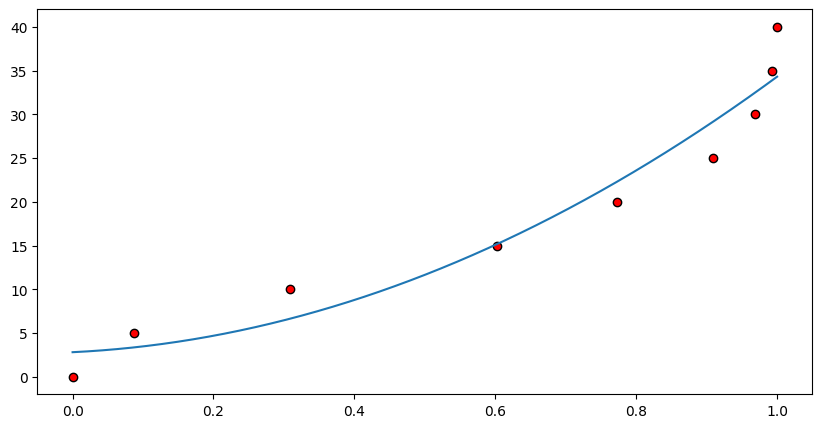

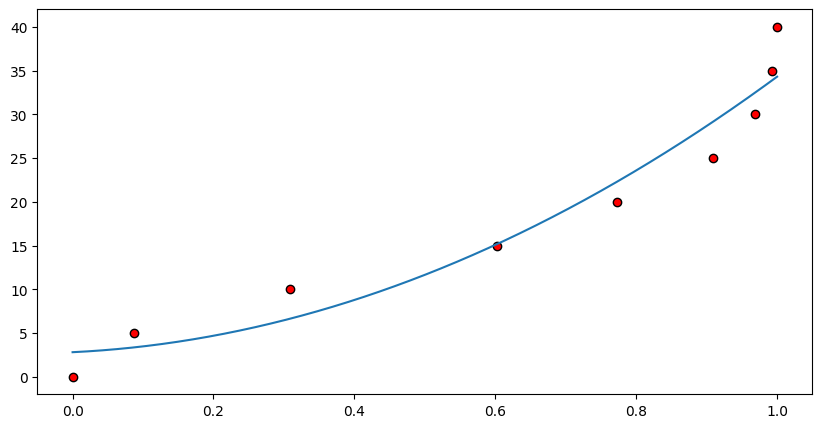

In [304]:
ajusta_polinomio(df_duracoes, 2)

In [305]:
def gerar_tabela_nan(df_tabela_ligantes: pd.DataFrame,
                     df_duracoes: pd.DataFrame,
                     tempo_maximo_espera: float = 10,
                     tempo_descanso: int = 0,
                     g: int = 5) -> list:

    """
    Função para gerar a lista de NANs para cada período do dia

    Args:
        df_tabela_ligantes (pd.DataFrame): DataFrame com a quantidade de ligantes. 
        (obrigatório)
        df_duracoes (pd.DataFrame): DataFrame com as durações das ligações. 
        (obrigatório)
        tempo_maximo_espera (float): Tempo máximo de espera (opcional, default=10)
        g (int): Grau do polinômio de ajuste (opcional, default=5)
    Returns:
        pd.DataFrame: DataFrame com a quantidade de NANs
    """

    coefs = metodo_minimos_quadrados.mmq(
        entradas=df_duracoes.loc[:, "percentagem_acumulada"],
        saidas=df_duracoes.loc[:, "duracao_conexao"],
        g=g)


    # conjunto de nan para cada periodo do dia 
    # (18:15 - 18:30, 18:30 - 18:45, ..., 18:00 - 18:15)
    coluna_nan = []

    # para cada linha (periodo do dia) da tabela de ligantes (96 linhas)
    for i, linha in df_tabela_ligantes.iterrows():

        # pega a qtd_ligantes para cada periodo do dia
        qtd_ligantes = linha["numero_medio_ligantes"]

        # gera aleatoriamente os momentos de ligação para cada periodo do dia
        momentos_ligacoes = np.random.randint(low=0, high=900, size=qtd_ligantes)
        # ordena os momentos de ligação para executar o algoritmo nan
        momentos_ligacoes.sort()
        
        # cria uma lista de atendentes necessários para atender as ligações para cada 
        # periodo do dia
        atendentes: list[dict] = []

        # para cada ligação
        for momento_ligacao in momentos_ligacoes:
            
            # gerando a duração da ligação
            aleatorio = np.random.rand()

            # gerando a duração da ligação
            duracao = abs(np.polyval(coefs, aleatorio))

            # para cada atendente, checar se ele estará ocupado no momento da 
            # ligação + tempo máximo de espera. Se não estiver, ele atende a ligação
            # se todos estiverem ocupados, criar um novo atendente
            for atendente in atendentes:

                fim_atendimento = atendente["fim_atendimento"] + tempo_descanso

                # checando se o atendente está ocupado daqui a 10 segundos do momento 
                # da ligação ocupado = atendente.checar_ocupado(momento_ligacao + 10)
                if momento_ligacao + tempo_maximo_espera > fim_atendimento:
                    ocupado = False
                else:
                    ocupado = True

                if not ocupado:
                    # se o atendente não estiver ocupado, ele atende a ligação
                    # atendente.atender_ligacao_futura(duracao)
                    if momento_ligacao + tempo_maximo_espera > fim_atendimento:
                        atendente["inicio_atendimento"] = \
                            momento_ligacao + tempo_maximo_espera
                    else:
                        atendente["inicio_atendimento"] = fim_atendimento
                    
                    atendente["fim_atendimento"] = \
                        atendente["inicio_atendimento"] + duracao
                    break
            else:
                # entra aqui apenas se nunca ocorrer o break (ou seja, 
                # se todos os atendentes estiverem ocupados)

                novo_atendende = {"inicio_atendimento": momento_ligacao, 
                                "fim_atendimento": momento_ligacao + duracao}
                atendentes.append(novo_atendende)

        # após 'varrer' todas as ligações simuladas de cada período do dia, coletar a 
        # quantidade de atendentes criados para atender todas as ligações com 
        # 10 segundos de tempo máximo de espera    
        nan = len(atendentes)
        
        # antes de partir para a simulação do próximo período do dia, adicionar o 
        # resultado na coleção de nan para cada período do dia
        coluna_nan.append(nan)

    return coluna_nan

In [306]:
gerar_tabela_nan(df_tabela_ligantes,
                 df_duracoes,
                 10, 0, 5)

[20,
 9,
 8,
 10,
 8,
 6,
 6,
 7,
 6,
 4,
 5,
 5,
 5,
 4,
 4,
 5,
 3,
 3,
 3,
 4,
 5,
 4,
 4,
 3,
 5,
 8,
 7,
 8,
 18,
 21,
 23,
 23,
 39,
 47,
 38,
 42,
 60,
 63,
 62,
 67,
 71,
 73,
 69,
 71,
 67,
 74,
 65,
 68,
 54,
 63,
 59,
 61,
 61,
 68,
 67,
 69,
 67,
 65,
 63,
 63,
 66,
 72,
 70,
 68,
 65,
 67,
 71,
 72,
 76,
 70,
 75,
 66,
 52,
 52,
 46,
 50,
 44,
 37,
 40,
 38,
 41,
 38,
 37,
 37,
 34,
 35,
 30,
 29,
 30,
 26,
 28,
 28,
 25,
 17,
 16,
 19]

In [307]:
def gera_tabelas(
        qtd_horas_total, minutos_dividir,
        hora_inicial, minuto_inicial,
        turnos, encargos):

    hora_final = (hora_inicial + qtd_horas_total) % 24
    minuto_final = (qtd_horas_total - int(qtd_horas_total)) * 60

    dia_final = 1
    if hora_inicial == hora_final and minuto_inicial == minuto_final:
        dia_final = 2
    
    inicios = \
        pd.date_range(
        start=f"2000-01-01 {hora_inicial:02}:{minuto_inicial:02}:00",
        end=dtm.strptime(
        f"2000-01-{dia_final:02} {int(hora_final):02}:{int(minuto_final):02}:59", "%Y-%m-%d %H:%M:%S"),
        freq=f"{minutos_dividir}min").strftime("%H:%M:%S").tolist()[:-1]
    
    finais = \
        [(dtm.strptime(inicio, "%H:%M:%S") + td(minutes=minutos_dividir)).strftime("%H:%M:%S") 
        for inicio in inicios]
    
    df_nad = pd.DataFrame({
        "regime": turnos,
        "enc": encargos})
    
    df_tabela_ligantes = pd.DataFrame({
        "rotulo": range(1, len(inicios) + 1),
        "hora_inicio": inicios,
        "hora_fim": finais})
    df_tabela_ligantes["numero_medio_ligantes"] = ""

    return df_nad, df_tabela_ligantes

In [308]:
encargos = [560, 640, 980]

In [309]:
turnos = [3, 4, 6]

In [310]:
df_nad, df_tabela_ligantes = gera_tabelas(qtd_dias_total, minutos_dividir,
                                          hora_inicial, minuto_inicial, 
                                          turnos, encargos)

In [311]:
df_nad

,regime,enc
0,3,560
1,4,640
2,6,980


In [312]:
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes
0,1,00:00:00,00:15:00,
1,2,00:15:00,00:30:00,
2,3,00:30:00,00:45:00,
3,4,00:45:00,01:00:00,
